In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression as lr
import statsmodels.formula.api as smf
from sklearn import preprocessing as pp

In [2]:
rd = pd.read_csv("D:/DS Files/DS Assingments/Assignments/Assignments Excel Sheets/bank-full.csv",sep = ';')

In [3]:
rd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
lb = pp.LabelEncoder()

In [5]:
rd['job']= lb.fit_transform(rd.job)
rd['marital'] = lb.fit_transform(rd.marital)
rd['education'] = lb.fit_transform(rd.education)
rd['default'] = lb.fit_transform(rd.default)
rd['housing'] = lb.fit_transform(rd.housing)
rd['loan'] = lb.fit_transform(rd.loan)
rd['contact'] = lb.fit_transform(rd.contact)
rd['poutcome'] = lb.fit_transform(rd.poutcome)
rd

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,no


In [6]:
rd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,no


In [7]:
rd.drop(['day'],inplace = True,axis = 1)

In [8]:
rd.drop(['month'],inplace = True,axis = 1)

In [9]:
rd = pd.get_dummies(rd,columns=['y'])

In [10]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int32
 14  y_no       45211 non-null  uint8
 15  y_yes      45211 non-null  uint8
dtypes: int32(8), int64(6), uint8(2)
memory usage: 3.5 MB


In [26]:
model = lr(max_iter = 500)

In [12]:
# divinding input and output variable
x = rd.iloc[:,0:14]
y = rd.iloc[:,14]

In [13]:
y

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    1
45210    1
Name: y_no, Length: 45211, dtype: uint8

In [27]:
model.fit(x,y)

E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [15]:
y_pred = model.predict(x)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=uint8)

In [16]:
y_pred_prob = model.predict_proba(x)
y_pred_prob

array([[0.04942701, 0.95057299],
       [0.05124795, 0.94875205],
       [0.04784243, 0.95215757],
       ...,
       [0.4003457 , 0.5996543 ],
       [0.06616543, 0.93383457],
       [0.50058594, 0.49941406]])

In [17]:
lr_df = pd.DataFrame({'Actual':y,'Predicted':y_pred,'Prob[0]':y_pred_prob[:,0],'Prob[1]':y_pred_prob[:,1]})

In [18]:
lr_df


,Actual,Predicted,Prob[0],Prob[1]
0,1,1,0.049427,0.950573
1,1,1,0.051248,0.948752
2,1,1,0.047842,0.952158
3,1,1,0.032719,0.967281
4,1,1,0.099667,0.900333
...,...,...,...,...
45206,0,0,0.519002,0.480998
45207,0,1,0.127140,0.872860
45208,0,1,0.400346,0.599654
45209,1,1,0.066165,0.933835


In [19]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as ac

In [20]:
lr_cm = cm(lr_df.Actual,lr_df.Predicted)
lr_cm

array([[ 1027,  4262],
       [  803, 39119]], dtype=int64)

In [21]:
lr_ac = ac(lr_df.Actual,lr_df.Predicted)
lr_ac

0.8879697418769769

In [22]:
cm = pd.crosstab(lr_df.Actual,lr_df.Predicted)
cm

Predicted,0,1
Actual,,
0,1027,4262
1,803,39119


In [23]:
from sklearn.metrics import classification_report as cr
print(cr(lr_df.Actual,lr_df.Predicted))

              precision    recall  f1-score   support

           0       0.56      0.19      0.29      5289
           1       0.90      0.98      0.94     39922

    accuracy                           0.89     45211
   macro avg       0.73      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [28]:
#roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np

In [29]:
fpr,tpr, thresholds = roc_curve(y,y_pred_prob[:,1])

In [52]:
df_roc = pd.DataFrame({'fpr':fpr,'tpr':tpr,'cutoff':thresholds})
df_roc

,fpr,tpr,cutoff
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.000025,1.000000e+00
2,0.000000,0.002154,9.999960e-01
3,0.000189,0.002154,9.999960e-01
4,0.000189,0.006763,9.999157e-01
...,...,...,...
7658,0.999244,0.999850,3.507550e-04
7659,0.999811,0.999850,1.690796e-04
7660,0.999811,0.999925,7.972209e-05
7661,1.000000,0.999925,5.755897e-05


In [83]:
#now check for optimal cutoff value
optimal_tpr = df_roc[np.round(df_roc['tpr'],2)==0.70]
optimal_cutoff = optimal_tpr[np.round(optimal_tpr['fpr'],2)==0.20]
optimal_tpr



,fpr,tpr,cutoff
2156,0.217054,0.695181,0.887953
2157,0.217243,0.695181,0.887938
2158,0.217243,0.695206,0.887935
2159,0.217432,0.695206,0.887935
2160,0.217432,0.695882,0.887719
2161,0.217621,0.695882,0.887711
2162,0.217621,0.696658,0.887569
2163,0.217811,0.696658,0.887564
2164,0.217811,0.697385,0.887381
2165,0.218000,0.697385,0.887380


Text(0, 0.5, 'True PositiveRate')

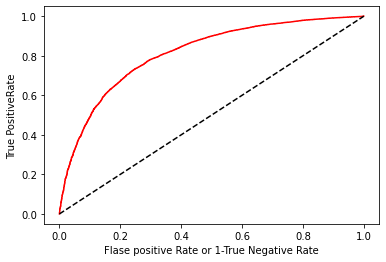

In [64]:
#plot roc curve 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr,tpr,color = 'red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('Flase positive Rate or 1-True Negative Rate')
plt.ylabel('True PositiveRate')

In [84]:
auc = roc_auc_score(y,y_pred)
print('auc with 0.8 as cutoff value:',auc)

auc with 0.8 as cutoff value: 0.5870311850971941


In [75]:
prob = y_pred_prob[:,1]
new_pred = pd.DataFrame({'actual':y,'pred':0})
new_pred

,actual,pred
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,1,0


In [76]:
new_pred.loc[prob>0.88,'pred']=1
new_pred

,actual,pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
45206,0,0
45207,0,0
45208,0,0
45209,1,1


In [77]:
cm_new = pd.crosstab(new_pred.actual,new_pred.pred)
cm_new

pred,0,1
actual,,
0,4038,1251
1,11140,28782


In [79]:
new_cr = cr(new_pred.actual,new_pred.pred)
print(new_cr)

              precision    recall  f1-score   support

           0       0.27      0.76      0.39      5289
           1       0.96      0.72      0.82     39922

    accuracy                           0.73     45211
   macro avg       0.61      0.74      0.61     45211
weighted avg       0.88      0.73      0.77     45211

